In [1]:
import numpy as np
import math
import pandas
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, LSTM, Flatten
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
def mmean(arr):
    sr = 0
    c = 0
    for i in arr:
        sr += i
        c += 1
    return sr/c

In [3]:
def trans_to_softmax(val, shape):
    buf = [0 for i in range(shape)]
    buf[val] = 1
    return buf

In [4]:
from random import randint as randint
def randcolor(n):
    buf = [str('#' + str(randint(10,99)) + '' + str(randint(10,99)) + ''+ str(randint(10,99))) for i in range(n)]
    return buf

Создание выборки по углам

In [5]:
def create_tg_viborka(arr):
    tg_a_p = []
    for i in arr:
        buf = []
        for c in range(len(i) - 1):
            buf.append(math.atan( ( i[c] - i[len(i)-1] ) / (len(i) - 1) ) )
        tg_a_p.append(buf)
    return tg_a_p

Создание выборки для кластеризации

In [6]:
def create_viborka(start, arr):
    arr_sr_t = []
    for i in range(start, len(arr)+1):
        arr_sr_t.append(arr[i - start:i])
    return arr_sr_t

Визуализация результатов класстеризации

In [7]:
def visualize(n_clust, predictions, arr, file_name = 'ind.png', sh = False):

    colors = randcolor(n_clust)

    not_train = len(arr) - len(predictions)
    
    
    for i in range(len(predictions)):
        color = predictions[i]
        val = arr[i + not_train]
        plt.scatter(i + not_train, val, c = colors[color])
        
    plt.plot(arr)
    if(sh):
        plt.show()
    plt.savefig(file_name)
    

Чиатем файл 2018 года и составляем список температур

In [8]:
d = pandas.read_excel('2018.xlsx', engine='openpyxl')
temp = []
buf = []
c = 0
for i in d['T']:
  buf.append(i)
  c += 1
  if c == 8:
    temp.append(buf)
    buf = []
    c = 0

Список средних значений в пачке

In [9]:
def mean_arr(arr):
    sr_temp = []
    for i in arr:
        sr_temp.append(mmean(i))
    return sr_temp

In [10]:
sr_temp = mean_arr(temp)

Выборка для класстеризации, количестов кластеров, сколько элементов в пачке для выборки

In [11]:
clusters__ = 8
in_vibor__ = 6

x_train = create_viborka(in_vibor__, sr_temp)
x_tg_train = create_tg_viborka(x_train)

In [11]:
sr_temp

[-2.4499999999999997,
 -3.4625000000000004,
 -6.675000000000001,
 -6.5625,
 -7.8125,
 -6.937499999999999,
 -8.850000000000001,
 -8.825000000000001,
 -7.625,
 -7.0375,
 -9.299999999999999,
 -8.975000000000001,
 -8.0875,
 -12.0125,
 -13.55,
 -11.737499999999999,
 -4.3999999999999995,
 -1.975,
 -0.625,
 0.6125,
 0.6625,
 0.2875,
 -3.8875,
 -4.1,
 -2.5875000000000004,
 -1.3375,
 -0.22499999999999998,
 -4.2875000000000005,
 -4.3625,
 -5.575,
 -11.6125,
 -10.987500000000002,
 -8.475000000000001,
 -6.1125,
 -3.9000000000000004,
 -2.4749999999999996,
 -2.275,
 -1.2125,
 -2.0749999999999997,
 -1.2125,
 -1.3125,
 -3.3375,
 0.95,
 0.7999999999999998,
 -0.8500000000000001,
 -3.2000000000000006,
 0.475,
 -1.35,
 -4.012499999999999,
 -5.025,
 -1.9375,
 1.7249999999999999,
 2.4625,
 2.8375,
 1.5875,
 1.825,
 3.5124999999999997,
 7.45,
 7.999999999999999,
 6.25,
 3.4999999999999996,
 -0.35,
 -0.36250000000000004,
 0.725,
 5.05,
 3.1125,
 1.9624999999999997,
 3.6750000000000003,
 4.45,
 4.4125000000000

In [12]:
x_tg_train

[[0.7314321680809359,
  0.607362371288824,
  0.05245184523589078,
  0.07485984771076667,
  -0.17324566645236514],
 [0.8226853257311154,
  0.41031015589594444,
  0.42907339605746486,
  0.20459658756236454,
  0.3653297453805159],
 [0.4060980583176157,
  0.42493098203063717,
  0.19979824624031495,
  0.3609606476071892,
  -0.004999958333958394],
 [0.20938539295349548,
  -0.037482436691661486,
  0.13664316249108727,
  -0.24026727278093876,
  -0.23554498072086355],
 [-0.15377630011950816,
  0.019997333973150642,
  -0.34776698785701565,
  -0.3433406466650633,
  -0.11696369089802384],
 [0.4414065853903529,
  0.08975817418995002,
  0.09471574598847536,
  0.32324980364814193,
  0.42493098203063684],
 [0.02499479361892016,
  0.029991004856877973,
  0.26371183446226637,
  0.36968428879530163,
  -0.06490868969343297],
 [-0.14644406768803553,
  0.09223752844312622,
  0.20699219421982115,
  -0.23790747868800954,
  -0.1756703449764861],
 [0.7202441758045743,
  0.7828919029808601,
  0.4970668238415453,

Создание модели для класстеризации, ее обучение и прогнозировние

In [13]:
len(sr_temp)

365

In [14]:
k_mean_model = KMeans(n_clusters = clusters__)
k_mean_model.fit(x_tg_train)
predictions = k_mean_model.predict(x_tg_train)

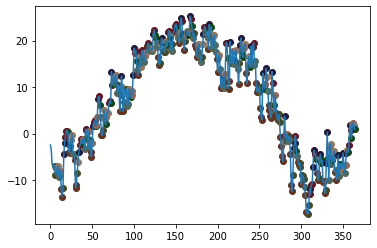

<Figure size 432x288 with 0 Axes>

In [15]:
visualize(clusters__,predictions,  sr_temp , sh = True)

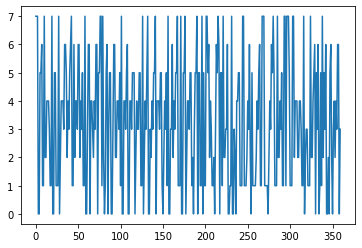

In [16]:
plt.plot(range(len(predictions)), predictions)

0 : 48, 1 : 63, 2 : 38, 3 : 42, 4 : 44, 5 : 53, 6 : 29, 7 : 43, 
 45


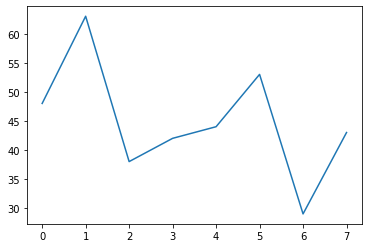

In [17]:
p111 = [0 for i in range(clusters__)]
for i in predictions:
    p111[i] += 1
for i in range(len(p111)): print(i, ':', p111[i], end = ', ')
plt.plot(range(len(p111)), p111)
print('\n', sum(p111)//len(p111))

Модель определяющая какой из кластеров будет после предыдущих N кластеров

Формирование обучающей выборки для модели предсказания кластера

In [18]:
size_of_vib = in_vibor__ - 1

x_train_cluster = []
y_train_cluster = []
for i in range(size_of_vib, len(predictions)):
    y_train_cluster.append(trans_to_softmax(predictions[i], clusters__))


for i in range(len(predictions) - size_of_vib):
    buf = [] 
    for j in range(i, i+size_of_vib):
        buf.append(float(predictions[j]))
    x_train_cluster.append(buf)

In [85]:
y_train_cluster

[[0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 

Модель

In [20]:
model = keras.Sequential()
model.add(Dense(input_dim = size_of_vib, units=80, activation='tanh')) 
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units = clusters__, activation='softmax'))

model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
info = model.fit(x_train_cluster, y_train_cluster, epochs = 300)

Epoch 1/300
12/12 [==============================] - 1s 1ms/step - loss: 2.2295 - accuracy: 0.1542
Epoch 2/300
12/12 [==============================] - 0s 1ms/step - loss: 2.0925 - accuracy: 0.1658
Epoch 3/300
12/12 [==============================] - 0s 1ms/step - loss: 2.0414 - accuracy: 0.2196
Epoch 4/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9989 - accuracy: 0.2095
Epoch 5/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9878 - accuracy: 0.1987
Epoch 6/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9544 - accuracy: 0.2613
Epoch 7/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9185 - accuracy: 0.2497
Epoch 8/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9496 - accuracy: 0.2309
Epoch 9/300
12/12 [==============================] - 0s 997us/step - loss: 1.9168 - accuracy: 0.2733
Epoch 10/300
12/12 [==============================] - 0s 997us/step - loss: 1.9174 - accuracy: 0.2636
Epoch

12/12 [==============================] - 0s 1ms/step - loss: 0.8223 - accuracy: 0.6960
Epoch 163/300
12/12 [==============================] - 0s 1ms/step - loss: 0.8403 - accuracy: 0.6700
Epoch 164/300
12/12 [==============================] - 0s 816us/step - loss: 0.8091 - accuracy: 0.7081
Epoch 165/300
12/12 [==============================] - 0s 997us/step - loss: 0.8630 - accuracy: 0.6996
Epoch 166/300
12/12 [==============================] - 0s 1ms/step - loss: 0.8300 - accuracy: 0.6761
Epoch 167/300
12/12 [==============================] - ETA: 0s - loss: 0.8217 - accuracy: 0.65 - 0s 816us/step - loss: 0.8229 - accuracy: 0.7175
Epoch 168/300
12/12 [==============================] - 0s 997us/step - loss: 0.8532 - accuracy: 0.6736
Epoch 169/300
12/12 [==============================] - 0s 1ms/step - loss: 0.8056 - accuracy: 0.7009
Epoch 170/300
12/12 [==============================] - 0s 997us/step - loss: 0.8141 - accuracy: 0.7008
Epoch 171/300
12/12 [==============================] 

In [22]:
predictions

array([7, 7, 7, 0, 0, 5, 5, 6, 1, 1, 7, 2, 2, 4, 4, 4, 3, 1, 1, 7, 0, 0,
       5, 5, 1, 1, 1, 7, 0, 2, 4, 4, 4, 3, 6, 6, 5, 2, 4, 3, 5, 6, 7, 1,
       1, 6, 2, 4, 4, 3, 6, 6, 2, 4, 3, 5, 1, 1, 7, 0, 0, 3, 6, 6, 0, 4,
       4, 3, 2, 4, 3, 6, 6, 0, 5, 5, 7, 7, 1, 7, 2, 0, 1, 5, 6, 0, 3, 5,
       5, 0, 0, 3, 6, 6, 2, 2, 4, 4, 3, 5, 1, 7, 0, 0, 4, 4, 3, 5, 6, 0,
       0, 4, 4, 3, 5, 5, 5, 0, 2, 4, 3, 3, 5, 5, 1, 1, 7, 0, 2, 4, 3, 5,
       7, 0, 0, 3, 2, 4, 3, 5, 5, 7, 0, 4, 4, 4, 3, 5, 5, 1, 0, 2, 4, 3,
       5, 1, 7, 0, 0, 3, 3, 6, 2, 4, 3, 5, 5, 7, 1, 1, 1, 7, 0, 0, 5, 5,
       7, 0, 2, 4, 4, 3, 5, 5, 1, 2, 0, 3, 5, 5, 7, 0, 5, 5, 1, 1, 7, 0,
       5, 1, 1, 7, 7, 5, 6, 2, 4, 3, 1, 1, 2, 0, 3, 6, 5, 7, 6, 0, 5, 5,
       1, 7, 2, 2, 3, 3, 6, 0, 0, 1, 1, 7, 0, 0, 3, 2, 0, 4, 4, 5, 5, 1,
       1, 1, 7, 7, 1, 1, 1, 2, 4, 3, 6, 2, 0, 5, 1, 1, 1, 1, 2, 4, 3, 5,
       6, 1, 1, 7, 7, 7, 1, 1, 1, 1, 0, 2, 4, 3, 6, 5, 7, 5, 1, 1, 1, 7,
       2, 2, 4, 3, 5, 1, 1, 7, 7, 1, 7, 7, 7, 5, 1,

In [23]:
np.argmax(model.predict([[7, 0, 2, 4, 5]]))

0

Создаем для каждого кластера свою сеть для предсказания следущего значения

In [24]:
NN = []
for i in range(clusters__):
    NN.append(keras.Sequential())

In [25]:
NN

Подготовка нсетей

In [77]:
for ns in NN:
    ns.add(Dense(input_dim = size_of_vib, units = 100, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 1))
    ns.compile(loss = 'mae', optimizer = 'RMSprop')

Формирование обучающих и тестовых выборок

In [78]:
x_last_train = [[] for i in range(clusters__)]
y_last_train = [[] for i in range(clusters__)]

In [79]:
for i in range(len(sr_temp) - in_vibor__):
    buf = sr_temp[i:i+size_of_vib]
    to_trans_buf = sr_temp[i:i+in_vibor__]
    tg_v = create_tg_viborka([to_trans_buf])
    predict_on = k_mean_model.predict(tg_v)
    pre = int(predict_on[0])
    yy = [to_trans_buf[-1]]
    

    x_last_train[pre].append(buf)
    y_last_train[pre].append(yy)


In [87]:
y_last_train

[[[-7.625],
  [-7.0375],
  [-1.3375],
  [-0.22499999999999998],
  [-6.1125],
  [5.05],
  [3.1125],
  [4.4125000000000005],
  [12.700000000000001],
  [10.0375],
  [8.4875],
  [9.625],
  [8.1625],
  [16.6625],
  [14.387500000000001],
  [17.500000000000004],
  [17.5],
  [18.337500000000002],
  [19.1875],
  [20.0],
  [18.775],
  [21.662499999999998],
  [21.912499999999998],
  [21.049999999999997],
  [21.9875],
  [19.1875],
  [19.212500000000002],
  [19.187500000000004],
  [21.6125],
  [21.2125],
  [16.900000000000002],
  [15.2375],
  [17.925],
  [18.4125],
  [19.225],
  [16.625],
  [14.887500000000001],
  [15.3125],
  [12.275000000000002],
  [-1.7625],
  [-4.999999999999999],
  [-2.175],
  [-3.7750000000000004],
  [-7.5],
  [-7.1625],
  [-6.7875000000000005],
  [-3.6250000000000004],
  [1.9375000000000002]],
 [[-12.0125],
  [-13.55],
  [-3.8875],
  [-4.1],
  [-5.575],
  [-11.6125],
  [-10.987500000000002],
  [-4.012499999999999],
  [-5.025],
  [-0.35],
  [-0.36250000000000004],
  [4.875],


In [80]:
for n in range(len(NN)):
    NN[n].fit(x_last_train[n], y_last_train[n], epochs = 200)

Epoch 1/200
2/2 [==============================] - 2s 4ms/step - loss: 13.9273
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 12.2319
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 11.4577
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 9.5663
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 10.9783
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 9.6836
Epoch 7/200
2/2 [==============================] - 0s 4ms/step - loss: 6.7511
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 6.7687
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 11.6190
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 6.0533
Epoch 11/200
2/2 [==============================] - 0s 4ms/step - loss: 3.6628
Epoch 12/200
2/2 [==============================] - 0s 4ms/step - loss: 8.4281
Epoch 13/200
2/2 [==============================] - 0s 6

2/2 [==============================] - 0s 3ms/step - loss: 3.9323
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 3.2383
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 2.1708
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 1.7215
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 6.3024
Epoch 11/200
2/2 [==============================] - 0s 3ms/step - loss: 3.8714
Epoch 12/200
2/2 [==============================] - 0s 4ms/step - loss: 5.6352
Epoch 13/200
2/2 [==============================] - 0s 3ms/step - loss: 3.6057
Epoch 14/200
2/2 [==============================] - 0s 2ms/step - loss: 4.5389
Epoch 15/200
2/2 [==============================] - 0s 3ms/step - loss: 5.5517
Epoch 16/200
2/2 [==============================] - 0s 3ms/step - loss: 4.4418
Epoch 17/200
2/2 [==============================] - 0s 3ms/step - loss: 5.6061
Epoch 18/200
2/2 [==============================] - 0s 3ms/step - lo

2/2 [==============================] - 0s 3ms/step - loss: 6.9439
Epoch 12/200
2/2 [==============================] - 0s 3ms/step - loss: 2.5120
Epoch 13/200
2/2 [==============================] - 0s 4ms/step - loss: 3.5527
Epoch 14/200
2/2 [==============================] - 0s 3ms/step - loss: 4.8233
Epoch 15/200
2/2 [==============================] - 0s 3ms/step - loss: 9.0140
Epoch 16/200
2/2 [==============================] - 0s 3ms/step - loss: 5.2619
Epoch 17/200
2/2 [==============================] - 0s 3ms/step - loss: 2.8622
Epoch 18/200
2/2 [==============================] - 0s 3ms/step - loss: 4.7675
Epoch 19/200
2/2 [==============================] - 0s 4ms/step - loss: 4.8682
Epoch 20/200
2/2 [==============================] - 0s 3ms/step - loss: 5.8064
Epoch 21/200
2/2 [==============================] - 0s 3ms/step - loss: 2.9209
Epoch 22/200
2/2 [==============================] - 0s 4ms/step - loss: 7.0302
Epoch 23/200
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 6.3369
Epoch 17/200
2/2 [==============================] - 0s 4ms/step - loss: 3.3439
Epoch 18/200
2/2 [==============================] - 0s 4ms/step - loss: 2.2041
Epoch 19/200
2/2 [==============================] - 0s 2ms/step - loss: 5.0986
Epoch 20/200
2/2 [==============================] - 0s 3ms/step - loss: 8.4676
Epoch 21/200
2/2 [==============================] - 0s 3ms/step - loss: 3.0450
Epoch 22/200
2/2 [==============================] - 0s 3ms/step - loss: 5.6891
Epoch 23/200
2/2 [==============================] - 0s 3ms/step - loss: 4.1576
Epoch 24/200
2/2 [==============================] - 0s 3ms/step - loss: 3.8566
Epoch 25/200
2/2 [==============================] - 0s 3ms/step - loss: 5.1022
Epoch 26/200
2/2 [==============================] - 0s 3ms/step - loss: 7.1486
Epoch 27/200
2/2 [==============================] - 0s 2ms/step - loss: 3.9169
Epoch 28/200
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 5.8014
Epoch 22/200
2/2 [==============================] - 0s 4ms/step - loss: 3.8810
Epoch 23/200
2/2 [==============================] - 0s 4ms/step - loss: 3.6317
Epoch 24/200
2/2 [==============================] - 0s 3ms/step - loss: 5.2606
Epoch 25/200
2/2 [==============================] - 0s 3ms/step - loss: 6.7072
Epoch 26/200
2/2 [==============================] - 0s 3ms/step - loss: 3.5966
Epoch 27/200
2/2 [==============================] - 0s 3ms/step - loss: 6.3541
Epoch 28/200
2/2 [==============================] - 0s 3ms/step - loss: 1.4434
Epoch 29/200
2/2 [==============================] - 0s 3ms/step - loss: 6.7221
Epoch 30/200
2/2 [==============================] - 0s 4ms/step - loss: 3.3991
Epoch 31/200
2/2 [==============================] - 0s 3ms/step - loss: 4.8320
Epoch 32/200
2/2 [==============================] - 0s 4ms/step - loss: 6.0368
Epoch 33/200
2/2 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 6ms/step - loss: nan
Epoch 29/200
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 30/200
2/2 [==============================] - 0s 6ms/step - loss: nan
Epoch 31/200
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 32/200
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 33/200
2/2 [==============================] - 0s 5ms/step - loss: nan
Epoch 34/200
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 35/200
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 36/200
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 37/200
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 38/200
2/2 [==============================] - 0s 4ms/step - loss: nan
Epoch 39/200
2/2 [==============================] - 0s 6ms/step - loss: nan
Epoch 40/200
2/2 [==============================] - 0s 2ms/step - loss: nan
Epoch 41/200
2/2 [=======

1/1 [==============================] - 0s 5ms/step - loss: 5.8716
Epoch 41/200
1/1 [==============================] - 0s 6ms/step - loss: 5.4653
Epoch 42/200
1/1 [==============================] - 0s 4ms/step - loss: 4.4824
Epoch 43/200
1/1 [==============================] - 0s 4ms/step - loss: 2.5114
Epoch 44/200
1/1 [==============================] - 0s 4ms/step - loss: 3.3823
Epoch 45/200
1/1 [==============================] - 0s 4ms/step - loss: 5.0691
Epoch 46/200
1/1 [==============================] - 0s 4ms/step - loss: 3.7676
Epoch 47/200
1/1 [==============================] - 0s 5ms/step - loss: 1.2006
Epoch 48/200
1/1 [==============================] - 0s 5ms/step - loss: 1.7833
Epoch 49/200
1/1 [==============================] - 0s 5ms/step - loss: 3.6133
Epoch 50/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0497
Epoch 51/200
1/1 [==============================] - 0s 5ms/step - loss: 2.9526
Epoch 52/200
1/1 [==============================] - 0s 5ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 2.6613
Epoch 47/200
2/2 [==============================] - 0s 3ms/step - loss: 5.4741
Epoch 48/200
2/2 [==============================] - 0s 3ms/step - loss: 4.0997
Epoch 49/200
2/2 [==============================] - 0s 3ms/step - loss: 3.6102
Epoch 50/200
2/2 [==============================] - 0s 3ms/step - loss: 3.3073
Epoch 51/200
2/2 [==============================] - 0s 3ms/step - loss: 6.1171
Epoch 52/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7242
Epoch 53/200
2/2 [==============================] - 0s 3ms/step - loss: 1.4980
Epoch 54/200
2/2 [==============================] - 0s 3ms/step - loss: 1.8066
Epoch 55/200
2/2 [==============================] - 0s 3ms/step - loss: 3.4908
Epoch 56/200
2/2 [==============================] - 0s 3ms/step - loss: 5.3074
Epoch 57/200
2/2 [==============================] - 0s 3ms/step - loss: 5.3106
Epoch 58/200
2/2 [==============================] - 0s 4ms/step -

In [30]:

ptest = NN[3].predict([[-2.4499999999999997,-3.4625000000000004,-6.675000000000001,-6.5625,-7.8125,]])
ptest

array([[-4.795597]], dtype=float32)

In [31]:
d_n = pandas.read_excel('2019.xlsx', engine='openpyxl')
temp_n = []
buf_n = []
c_n = 0
for i in d_n['T']:
  buf_n.append(i)
  c_n += 1
  if c_n == 8:
    temp_n.append(buf_n)
    buf_n = []
    c_n = 0

In [32]:
sr_temp_n = mean_arr(temp_n)
sr_temp_n

[0.9499999999999998,
 -2.9,
 -3.4499999999999997,
 -1.5,
 -0.65,
 -0.2,
 0.41250000000000003,
 4.85,
 4.6000000000000005,
 2.375,
 1.2625,
 0.8875,
 4.675,
 2.7374999999999994,
 2.4000000000000004,
 1.9749999999999999,
 -0.12499999999999997,
 -0.050000000000000065,
 1.2625000000000002,
 1.65,
 2.0625,
 3.5375,
 3.3875,
 1.3,
 1.1624999999999999,
 1.825,
 0.9374999999999999,
 -2.0875,
 -2.125,
 -3.7875,
 -1.4749999999999999,
 1.85,
 1.175,
 -1.025,
 -0.7625000000000002,
 -5.5874999999999995,
 -4.45,
 -5.5875,
 -7.074999999999999,
 -6.4624999999999995,
 -6.200000000000001,
 2.9125,
 3.15,
 3.6625,
 4.9750000000000005,
 2.3000000000000003,
 3.1124999999999994,
 3.6999999999999997,
 3.5000000000000004,
 5.7,
 7.612500000000001,
 5.975,
 2.7249999999999996,
 3.0625,
 5.6375,
 10.3125,
 10.024999999999999,
 5.8125,
 2.5,
 1.3875,
 -1.2625,
 -2.7750000000000004,
 0.575,
 3.9000000000000004,
 8.6625,
 12.4125,
 10.124999999999998,
 10.25,
 10.7625,
 12.024999999999999,
 8.95,
 14.4375,
 14.012

In [33]:
x_train_n = create_viborka(in_vibor__, sr_temp_n)
x_tg_train_n = create_tg_viborka(x_train_n)

In [34]:
l = 0
while l < len(x_train_n):
    print(l, x_train_n[l])
    l += 1

0 [0.9499999999999998, -2.9, -3.4499999999999997, -1.5, -0.65, -0.2]
1 [-2.9, -3.4499999999999997, -1.5, -0.65, -0.2, 0.41250000000000003]
2 [-3.4499999999999997, -1.5, -0.65, -0.2, 0.41250000000000003, 4.85]
3 [-1.5, -0.65, -0.2, 0.41250000000000003, 4.85, 4.6000000000000005]
4 [-0.65, -0.2, 0.41250000000000003, 4.85, 4.6000000000000005, 2.375]
5 [-0.2, 0.41250000000000003, 4.85, 4.6000000000000005, 2.375, 1.2625]
6 [0.41250000000000003, 4.85, 4.6000000000000005, 2.375, 1.2625, 0.8875]
7 [4.85, 4.6000000000000005, 2.375, 1.2625, 0.8875, 4.675]
8 [4.6000000000000005, 2.375, 1.2625, 0.8875, 4.675, 2.7374999999999994]
9 [2.375, 1.2625, 0.8875, 4.675, 2.7374999999999994, 2.4000000000000004]
10 [1.2625, 0.8875, 4.675, 2.7374999999999994, 2.4000000000000004, 1.9749999999999999]
11 [0.8875, 4.675, 2.7374999999999994, 2.4000000000000004, 1.9749999999999999, -0.12499999999999997]
12 [4.675, 2.7374999999999994, 2.4000000000000004, 1.9749999999999999, -0.12499999999999997, -0.050000000000000065]

In [35]:
def num_max(arr):
    buf = arr[0]
    index = 0
    for i in range(1, len(arr)):
        if arr[i] > buf:
            buf = arr[i]
            index = i
    return(index)

In [36]:
def predict_one_day(temperatures, k_mean_model, nn_predict_cluster, nns_predicts_temp, size_of_vibor):
    if len(temperatures) != 2*size_of_vibor:
        return None
    
    temp_to_prognos = temperatures[len(temperatures) - size_of_vibor:len(temperatures)]
    
    in_vibor_ = size_of_vibor + 1
    tg_viborka = []
    x = create_viborka(in_vibor_, temperatures)
    tg_viborka = create_tg_viborka(x)
    
    pred = []
    
    for elm in tg_viborka:
        buf_predict = k_mean_model.predict([elm])
        buf_predict = int(buf_predict[0])
        pred.append(buf_predict)
    
    new_cluster = num_max(nn_predict_cluster.predict([pred]))
    
   
    prognos = nns_predicts_temp[new_cluster].predict([temp_to_prognos])
    
    return(prognos[0][0])

In [37]:
def accuracy(temperatures, predict, real):
    buf = ( abs(real - predict) ) / ( max(temperatures) - min(temperatures) ) * 100
    return(100 - buf)

In [38]:
def fallibility(temperatures, predict, real):
    buf = ( abs(real - predict) ) / ( max(temperatures) - min(temperatures) ) * 100
    return(buf)

In [39]:
def calculate_accuracy(temperatures, k_mean_model, nn_predict_cluster, nns_predicts_temp, size_of_vibor):
    x_to_list = []
    for i in range(len(temperatures) - 2*size_of_vibor):
        x_to_list.append(temperatures[i:i+size_of_vibor*2])
    real_to_list = []
    for i in range(size_of_vibor*2, len(temperatures)):
        real_to_list.append(temperatures[i])
    
    accurscy_list = []
    for i in range(len(real_to_list)):
        buffer_predict = predict_one_day(x_to_list[i], k_mean_model, model, NN, size_of_vibor)
        buffer_real = real_to_list[i]
        buffer_accuracy = accuracy(temperatures, buffer_predict, buffer_real)
        accurscy_list.append(buffer_accuracy)
        
    return(accurscy_list)
    

In [40]:
buf = predict_one_day(sr_temp[0:10], k_mean_model, model, NN, size_of_vib)

In [41]:
sr_temp[10]

-9.299999999999999

In [42]:
buf

-7.3595366

In [81]:
ddd = calculate_accuracy(sr_temp_n, k_mean_model, model, NN, size_of_vib)

In [82]:
def srednee(arr):
    summ = 0
    for i in arr: summ += i
    return (summ / len(arr))

In [83]:
print(srednee(ddd))

90.00922685770938


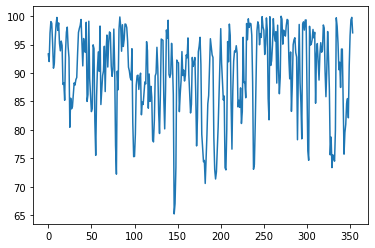

In [84]:
plt.plot(ddd)
plt.savefig('saved_figure.png')

In [47]:
def calculate_fallibility(temperatures, k_mean_model, nn_predict_cluster, nns_predicts_temp, size_of_vibor):
    x_to_list = []
    for i in range(len(temperatures) - 2*size_of_vibor):
        x_to_list.append(temperatures[i:i+size_of_vibor*2])
    real_to_list = []
    for i in range(size_of_vibor*2, len(temperatures)):
        real_to_list.append(temperatures[i])
    
    fallibility_list = []
    for i in range(len(real_to_list)):
        buffer_predict = predict_one_day(x_to_list[i], k_mean_model, model, NN, size_of_vibor)
        buffer_real = real_to_list[i]
        buffer_fallibility = fallibility(temperatures, buffer_predict, buffer_real)
        fallibility_list.append(buffer_fallibility)
        
    return(fallibility_list)

In [48]:
ddd = calculate_fallibility(sr_temp_n, k_mean_model, model, NN, size_of_vib)

In [49]:
print(srednee(ddd))

7.993739468599956


Сохранение моделей

In [50]:
model.save('model.h5')

In [52]:
for index in range(len(NN)):
    NN[i].save('NN'+str(index)+'.h5')

TypeError: list indices must be integers or slices, not float

In [ ]:
import pickle

filename = 'kmeans.sav'
pickle.dump(k_mean_model, open(filename, 'wb'))

Load modeles

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model.predict([[0.7314321680809359,
  0.607362371288824,
  0.05245184523589078,
  0.07485984771076667,
  -0.17324566645236514]])

In [ ]:
SUPPER = keras.models.load_model('model.h5')

In [ ]:
np.argmax(SUPPER.predict([[4,4,4,5,5]]))

In [ ]:
SUPER_NN = []
for i in range(clusters__):
    buf = keras.models.load_model('NN'+str(i)+'.h5')
    SUPER_NN.append(buf)

In [ ]:
ddd = calculate_fallibility(sr_temp_n, loaded_model, SUPPER, SUPER_NN, size_of_vib)

In [ ]:
print(srednee(ddd))

7.025432455271324

In [ ]:
sr_temp[10]

In [ ]:
print(predict_one_day(sr_temp[15:25], loaded_model, SUPPER, SUPER_NN, size_of_vib))

In [ ]:
sr_temp[15:26]
